# Phase 4 Code Challenge Review

Made using resources that Max put together, thanks Max!

## Overview

- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [36]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Principal Component Analysis

![pca gif saved from learnco](images/pca.gif)

## PCA Concepts

### 1: What does PCA do? 

Specifically, describe what the first principal component represents in relation to the original data.

#### Answer: 

- PCA reduces dimensionality 
- 1st component explains the greatest amount of variance within the data (features)
- uses linear algebra and eigenvectors and eigenvalues to find components
- eliminates multicollinearity (components are orthogonal)

### 2: What are some reasons to use PCA?

#### Answer: 

- Reduce multicollinearity
- Explain as much variance with as few as possible features (reduce dimensionality)
- Reduce complexity
- Handle really large datasets (and lots of features)
- Potentially faster computation
- Potentially help visualize data
- Only when interpretability is not needed


### 3: Why is scaling important for PCA?

#### Answer: 

- Because the numbers in our data are distance based and so it's important they are all on the same scale.


### 4: How can one determine how many principle components to use in a model?

#### Answer: 

- Looking at your explained variances, and stop after diminishing returns
- You can set how many components using n_components
    - tune like a hyperparameter (grid search)
- If solely for visualization max you want 2 or 3


## PCA in Code

### Set Up

In [37]:
from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 5: Prepare our Data for PCA

What steps do we need to take to preprocess our data effectively?

- Scale the data


In [38]:
# Code to preprocess X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### 6: Import PCA, Then Instantiate and Fit a PCA Object

In [39]:
# Code to import, instantiate and fit a PCA object

from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X_pca = pca.fit_transform(X_scaled)

### 7: How Much Variance is Explained by the First 2 Components?

In [40]:
pca.explained_variance_ratio_[0:2]

array([0.44272026, 0.18971182])

#### Answer:

- 44% + 19% = 63%


# 2) Clustering

## Clustering Concepts

### 8: Describe how the K-Means algorithm updates its cluster centers after initialization.

#### Answer:

- random cluster starts
- calculating the distance between the centers and each observation or data point.
- observations are then assigned to the closest centroid
- centroid true center is recalculated based on the observations assigned to it
- recalculates new distances, and recenters again ... Repeat until cluster center stops moving or tolerence is met





# The image of the cluster centers moving will be on the code challenge

### 9: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#### Answer:

- Inertia is the inter cluster variance in distance to points
- smaller inertia is better, less variance means a cluster is more dense (tigtly formed)
- elbow plot.  Looking for the elbow where diminishing returns happens.


### 10: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

#### Answer:

- Silhoutte score 1 is the highest and best -1 is the worst
- 0 denotes, model cannot distinguish points between clusters.


## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.


### Set Up

In [41]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

### 11: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- scale data, distance based


In [42]:
# Code to preprocess the data
# Name the processed data X_processed
k_scaler = StandardScaler()

X_processed = k_scaler.fit_transform(X)


### 12: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [43]:
# Import the relevent clustering algorithm

from sklearn.cluster import AgglomerativeClustering

In [44]:
# Fit the object

ac = AgglomerativeClustering(n_clusters=2)

ac.fit(X_processed)

AgglomerativeClustering()

In [45]:
# Calculate a silhouette sscore

from sklearn.metrics import silhouette_score



In [46]:
silhouette_score(X_processed, ac.labels_)

0.5770346019475988

## The closer to 1 the better. Silhouette scores fall between 1 and -1

### 13: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [47]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    cluster = AgglomerativeClustering(n_clusters=n)
    
    # Fit the new clustering model
    cluster.fit(data)
    # Print the silhouette score
    print(silhouette_score(data, cluster.labels_))
    
    # Return the labels attribute from the fit clustering model
    
    return cluster.labels_

In [48]:
# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)

0.5770346019475988
0.4466890410285909
0.4006363159855973
0.33058726295230545
0.3148548010051283
0.31696983029912795
0.31094652900725794


# 3) Time Series

In [49]:
# New dataset for this section!
ap = pd.read_csv('data/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 14: Prepare our Data for Time Series Analysis

What steps do we need to take to preprocess our data effectively?

- Set the index to be a datetime object, in this case we need to use Month column, change to a datetime and set as your dataframe index


In [50]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [51]:
ap['Month']= pd.to_datetime(ap.Month)

In [52]:
ap.set_index('Month', inplace=True)

In [53]:
ap.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### 15: Explore Patterns in the Data

First: what kinds of patterns can one find in time series data?

- seasonality/period
- cyclical 
- trends
    - upward or downward means
    - trends in variance
- look at stationarity to find certain patterns


Second, plot this time series data. What kinds of patterns do you see in this dataset?

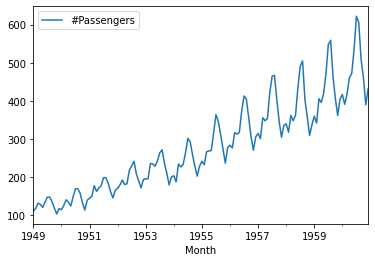

In [54]:
# Code to plot the time series

ap.plot();

### 16: Explore the Moving Average

What window would make sense to use for this data?

- window = 12 (monthly data with a yearly trend)


In [60]:
# Code to create the moving average

rolmean = ap.rolling(window=12).mean()
rolmean

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


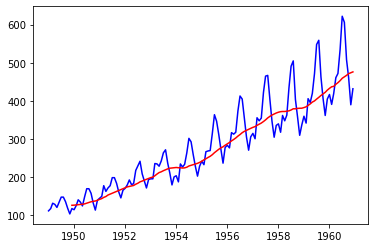

In [56]:
# Add to the moving average to the above plot

orig = plt.plot(ap, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')

### 17: Explore Stationarity


Why do we try to make our data stationary?

- This allows us to only capture the noise in our data and not just trends and patterns.
- Models generally perform better on stationary data because it helps the model focus on the part that needs predicting (the noise)


What can we do to make our data stationary?

- subtract the rolling mean
- log transformation (or other transformation)
- difference (subtract previous with current)


### 18: Check Stationarity

In [57]:
# Code here to check if the data is stationary

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(ap)

In [58]:
dftest

(0.815368879206047,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

The null hypothesis is that the data is not stationary and since the p_value is larger than alpha (.05) we cannot reject the null.

### 19: Try to Make the Data Stationarity

Implement one strategy to try to make the data more stationary, then check if it worked.

In [32]:
# you could log transform, subtract the rolling mean, 

In [62]:
# Code here to try to make the data stationary

ap_rolmean = ap-rolmean
ap_rolmean.dropna(inplace=True)

In [63]:
# Code here to check if the data is stationary
adfuller(ap_rolmean)

(-3.1649681299551427,
 0.022104139473878973,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 906.2878851500943)

In [66]:
dfoutput = pd.Series(
    adfuller(ap_rolmean)[0:4],
    index=['Test Statistic', 'p-value',
           '#Lags Used', 'Number of Observations Used']
)

for key, value in adfuller(ap_rolmean)[4].items():
    dfoutput['Critical Value (%s)' % key] = value

display(dfoutput)

Test Statistic                  -3.164968
p-value                          0.022104
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64

In [67]:

diff_ap = ap.diff().dropna()

In [69]:
adfuller(diff_ap)

(-2.8292668241700056,
 0.054213290283824704,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

<a id='clust'></a>

# 4) Natural Language Processing

## NLP Concepts

### Some Example Text

In [70]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 20: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

#### Answer:

1. lowercase (standardize case)
2. tokenize on spaces
3. pos_tag so you can lemmatize on parts of speech
4. remove stop words
5. remove punctuations

### 21: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

#### Answer:

- rows = documents (sentences)
- columns = all the words/tokens in the dataset
    - depending on the vectorizor, values could be counts or tf-idf scores


### 22: What does TF-IDF do?

Also, what does TF-IDF stand for?

#### Answer:

- creates a score that determines the importance of a toke in a singular document as compared to the frequency it appears in all the other documents in the corpus.
- term frequency - inverse document frequency


## NLP in Code

### Set Up

In [71]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [72]:
policies.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\nIm...",1
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1


The documents for activity are in the `policy` column, and the target is candidate. 

### 23: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [73]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split


X= policies['policy']
y= policies['candidate']
# Code here to train test split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [74]:
# Import the relevant vectorizer

from sklearn.feature_extraction.text import CountVectorizer

In [75]:
# Instantiate it
cv = CountVectorizer()

In [76]:
# Fit it
cv.fit(X_train)

CountVectorizer()

### 24: Vectorize Your Text, Then Model

In [77]:
# Code here to transform train and test sets with the vectorizer

X_train_vec = cv.transform(X_train)
X_test_vec = cv.transform(X_test)

In [78]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model
rfc = RandomForestClassifier()
rfc.fit(X_train_vec, y_train)

RandomForestClassifier()

In [79]:
# Code here to evaluate your model on the test set

rfc.score(X_train_vec, y_train)

1.0

In [80]:
rfc.score(X_test_vec, y_test)

0.9375